In [ ]:
from IPython.display import clear_output
!pip install pyarabic
!pip install emoji
clear_output()
import re
import pandas as pd
import matplotlib.pyplot as plt
from pyarabic import araby
from nltk.corpus import stopwords
import nltk
import emoji
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#download the required datasets
from google.colab import drive
drive.mount('GoogleDrive')

In [ ]:
cd /content/GoogleDrive/MyDrive/SeniorProject1/data

In [ ]:
arabic_emoji = pd.read_csv('arabic_emojis.csv')
UNICODE_EMOJI = dict(map(lambda i,j : (i,j) , list(arabic_emoji['emoji']),list(arabic_emoji['text'])))

In [ ]:
uncleaned_data=pd.read_excel('collected_data_v2.0.xlsx').drop(columns=['Unnamed: 0','Unnamed: 4'])
uncleaned_data

,Tweet_ID,Tweet_Text,Class
0,1444325619513401088,خلال زيارتي اليوم للجناح السعودي في إكسبو دبي ...,positive
1,1451962946461052928,هنا زيارتي لجناح المملكة في إكسبو والذي يأخذك ...,positive
2,1487417431262117888,أثناء زيارتي جناح ألمانيا في إكسبو دبي ٢٠٢٠ .....,positive
3,1454025160659508992,خلال زيارتي لجناح سيشل ولقائي مع رئيسها بجناحه...,positive
4,1509228218733276928,جزء من زيارتي للجناح الوطني لـ #الامارات في #E...,positive
...,...,...,...
3281,1451110060709581056,"""يا خسارة المرجلة واطلع من حياتي وبُعدك مكسب"" ...",non-relevant
3282,1469355547199962880,النرويجي ماجنوس كارلسين يفوز بخامس مبارياته في...,non-relevant
3283,1508853891479313920,@Abdulkhaleq_UAE @expo2020dubai خسارة حكومة دب...,non-relevant
3284,1494733730635730944,@os1500 @UAE_Godfather وانا رايح اكسبو دبي اشو...,neutral


In [ ]:
uncleaned_data.drop(uncleaned_data.index[uncleaned_data['Class']=='non-relevant'],inplace=True)

In [ ]:
uncleaned_data['Class'].value_counts()

Class
positive    1561
neutral      624
negative     329
Name: count, dtype: int64

In [ ]:
uncleaned_data.isnull().sum()

Tweet_ID      0
Tweet_Text    0
Class         4
dtype: int64

In [ ]:
uncleaned_data.dropna(inplace=True)
uncleaned_data['Class'].value_counts()

Class
positive    1561
neutral      624
negative     329
Name: count, dtype: int64

In [ ]:
#stopwords
ar_stops = set(stopwords.words('arabic'))
stop_words = {"،","","ورحمه","وبركاته","عليكم","السلام","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل",
"أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك",
"أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ",
"إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ",
"اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان",
"الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين",
"اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي",
"ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما",
"بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم",
"تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول",
"حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا",
"ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا",
"شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم",
"عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو",
"فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب",
"كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى",
"لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ",
"لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا",
"مازال","مافتئ","مايو","متى","مثل","مذ","مساء","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ",
"منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا",
"هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ",
"هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت",
"ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}

In [ ]:
def clean_data(text):
  text=str(text)
  #remove repeated words of  ا و ي ح خ ر
  text=re.sub(r'([اويخحر])\1+', r'\1', text)
  #remove urls
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
  #remove punctuations
  text = re.sub('[_]', ' ',  text)
  text = re.sub(r'[!()-{};:\,<>./?@#$%^&*_~\n\t""،]',' ',text)
  #remove non-arabic characters & digits
  #text = re.sub(r'[A-Za-z0-9٠-٩]+', '', text)
  text =re.sub(r'[^0-9\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD.0-9٠-٩]+', ' ',text)
  #remove @usernames
  text = re.sub('@[^\s]+', ' ', text)
  #remove laughs of any long and normalized it to ههه
  text= re.sub('[ه]{3,}', 'ههه', text)
  #remove diacritics
  text = araby.strip_diacritics(text)
  #remove tashkeel
  text = araby.strip_tashkeel(text)
  #remove tatweel
  text = araby.strip_tatweel(text)
  #remove stop
  tokens=word_tokenize(text)
  text=" ".join([w.strip() for w in tokens if not w in ar_stops and not w in stop_words and len(w) >= 2])

  #convert emoji to text
  for emot in UNICODE_EMOJI:
      text = ''.join("_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()) + " " if emot in UNICODE_EMOJI else emot for emot in text)
  #remove other emojis
  text = emoji.replace_emoji(text, replace='')

  return text


In [ ]:
uncleaned_data['Cleaned_Tweet_Text']=uncleaned_data['Tweet_Text'].apply(lambda text: clean_data(text))
uncleaned_data

,Tweet_ID,Tweet_Text,Class,Cleaned_Tweet_Text
0,1444325619513401088,خلال زيارتي اليوم للجناح السعودي في إكسبو دبي ...,positive,زيارتي للجناح السعودي إكسبو دبي أكبر جناح المع...
1,1451962946461052928,هنا زيارتي لجناح المملكة في إكسبو والذي يأخذك ...,positive,زيارتي لجناح المملكة إكسبو يأخذك رحلة ماضي وحا...
2,1487417431262117888,أثناء زيارتي جناح ألمانيا في إكسبو دبي ٢٠٢٠ .....,positive,أثناء زيارتي جناح ألمانيا إكسبو دبي ٢٠٢٠ أكبر ...
3,1454025160659508992,خلال زيارتي لجناح سيشل ولقائي مع رئيسها بجناحه...,positive,زيارتي لجناح سيشل ولقائي رئيسها بجناحهم إكسبو ...
4,1509228218733276928,جزء من زيارتي للجناح الوطني لـ #الامارات في #E...,positive,جزء زيارتي للجناح الوطني الامارات فعلا منطقة ا...
...,...,...,...,...
3274,1494621583939363072,#ERROR!,negative,
3276,1555922564647718912,@oqlat2 @nalfayez والله وعد ليكون تسويق عالمي ...,negative,والله وعد ليكون تسويق عالمي مش زي اكسبو دبي خس...
3278,1453698347886386944,@omansmh الحين معرض #اكسبو_دبي_٢٠٢١ هو معرض لل...,negative,الحين معرض اكسبو دبي ٢٠٢١ معرض للتراث الحرفيات...
3284,1494733730635730944,@os1500 @UAE_Godfather وانا رايح اكسبو دبي اشو...,neutral,وانا رايح اكسبو دبي اشوف الشوارع الترويج للسيا...


In [ ]:
uncleaned_data.to_csv('cleaned_collectedData.csv')

### Merge with the Pre-collected Tweets

In [ ]:
precollected_dataset=pd.read_csv('final_tweets_classified.csv',).drop(columns='Unnamed: 0')
precollected_dataset

,ID,Tweet,Class
0,1.497300e+18,قبيل الاحتفال بـ اليوم الدولي لمراة تستعد كوكب...,positive
1,1.497300e+18,لحظات نزول دابانغ سلمان خان علا ارض المسرح اك...,positive
2,1.497300e+18,ليلة ميزة بانتظارنا الحانها شرقية نجومها است...,positive
3,1.497300e+18,اصدق حفلة احلا فستان مستان انا بختار واذا حفل...,positive
4,1.497290e+18,جنون بعده جنون دابانغ سلمان خان يستعرض حشد كب...,positive
...,...,...,...
5870,1.510700e+18,اغلق معرض اكسبو الامارات اجلته الجاءحة ابوا...,neutral
5871,1.510690e+18,اختام معرض اكسبو دبي يومين الخميس فرصة المعرض...,positive
5872,1.510690e+18,هاشتاق عربي انتهاءه الامارات تكشف عد زوار اكسب...,neutral
5873,1.510690e+18,الحمدله انجاز راءع شكرا الامارات الحبيبه نبارك...,positive


In [ ]:
precollected_dataset['Class'].value_counts()

Class
positive    3189
neutral     2464
negative     222
Name: count, dtype: int64

In [ ]:
collected_data=uncleaned_data[['Tweet_ID','Cleaned_Tweet_Text','Class']]
collected_data.columns=precollected_dataset.columns #unify columns names
collected_data.head()

,ID,Tweet,Class
0,1444325619513401088,زيارتي للجناح السعودي إكسبو دبي أكبر جناح المع...,positive
1,1451962946461052928,زيارتي لجناح المملكة إكسبو يأخذك رحلة ماضي وحا...,positive
2,1487417431262117888,أثناء زيارتي جناح ألمانيا إكسبو دبي ٢٠٢٠ أكبر ...,positive
3,1454025160659508992,زيارتي لجناح سيشل ولقائي رئيسها بجناحهم إكسبو ...,positive
4,1509228218733276928,جزء زيارتي للجناح الوطني الامارات فعلا منطقة ا...,positive


In [ ]:
full_dataset=pd.concat([collected_data,precollected_dataset])
full_dataset

,ID,Tweet,Class
0,1.444326e+18,زيارتي للجناح السعودي إكسبو دبي أكبر جناح المع...,positive
1,1.451963e+18,زيارتي لجناح المملكة إكسبو يأخذك رحلة ماضي وحا...,positive
2,1.487417e+18,أثناء زيارتي جناح ألمانيا إكسبو دبي ٢٠٢٠ أكبر ...,positive
3,1.454025e+18,زيارتي لجناح سيشل ولقائي رئيسها بجناحهم إكسبو ...,positive
4,1.509228e+18,جزء زيارتي للجناح الوطني الامارات فعلا منطقة ا...,positive
...,...,...,...
5870,1.510700e+18,اغلق معرض اكسبو الامارات اجلته الجاءحة ابوا...,neutral
5871,1.510690e+18,اختام معرض اكسبو دبي يومين الخميس فرصة المعرض...,positive
5872,1.510690e+18,هاشتاق عربي انتهاءه الامارات تكشف عد زوار اكسب...,neutral
5873,1.510690e+18,الحمدله انجاز راءع شكرا الامارات الحبيبه نبارك...,positive


In [ ]:
full_dataset.drop_duplicates(subset=['Tweet'],inplace=True)

In [ ]:
len(full_dataset)

8342

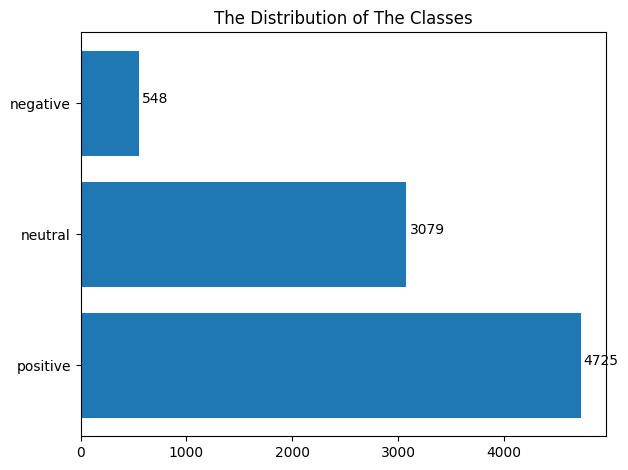

In [ ]:
classes=dict(full_dataset['Class'].value_counts())

_,ax=plt.subplots()
plt.barh(list(classes.keys()),list(classes.values()))
for i, value in enumerate(classes.values()):
  ax.text(value+30,i,str(value))
plt.title('The Distribution of The Classes')
plt.tight_layout()

In [ ]:
full_dataset.to_csv('Final_Full_Dataset.csv')